# Autoregression on Stock data 

## Data Retrieval

### Import needed Python packages

In [1]:

import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

### Retrieve data from Yahoo's Finance API

In [3]:
symbols = ['AMZN','AAPL','GOOGL','INTC','MSFT']

start = dt.datetime(2016, 10, 1)
end = dt.datetime(2017, 10, 30)

volume = []
closes = []
for symbol in symbols:
    print( symbol)
    vdata = pdr.get_data_yahoo(symbol, start, end)
    cdata = vdata[['Close']]
    closes.append(cdata)
    vdata = vdata[['Volume']]
    volume.append(vdata)
# If you download too frequently, you will be temporarily timed out

AMZN
AAPL
GOOGL
INTC
MSFT


### Create dataframes of stock price data

In [4]:
volume = pd.concat(volume, axis = 1).dropna()
volume.columns = symbols
volume.head()

,AMZN,AAPL,GOOGL,INTC,MSFT
Date,,,,,
2016-10-03,2769400,21701800,1489200,14113600,19189500
2016-10-04,2950300,29736800,1258700,14393100,20085900
2016-10-05,3469100,21453100,1213800,22420800,16726400
2016-10-06,2684000,28779300,1099900,15171400,16212600
2016-10-07,2426200,24358400,1163100,16942500,20089000


In [5]:
closes = pd.concat(closes, axis = 1).dropna()
closes.columns = symbols
closes.head()

,AMZN,AAPL,GOOGL,INTC,MSFT
Date,,,,,
2016-10-03,836.739990,112.519997,800.380005,37.660000,57.419998
2016-10-04,834.030029,113.000000,802.789978,37.540001,57.240002
2016-10-05,844.359985,113.050003,801.229980,37.990002,57.639999
2016-10-06,841.659973,113.889999,803.080017,38.070000,57.740002
2016-10-07,839.429993,114.059998,800.710022,38.099998,57.799999


In [6]:
len(closes['AMZN'])

272

## Exploratory Analysis  

#### Time Series plot of daily closing prices for 5 symbols

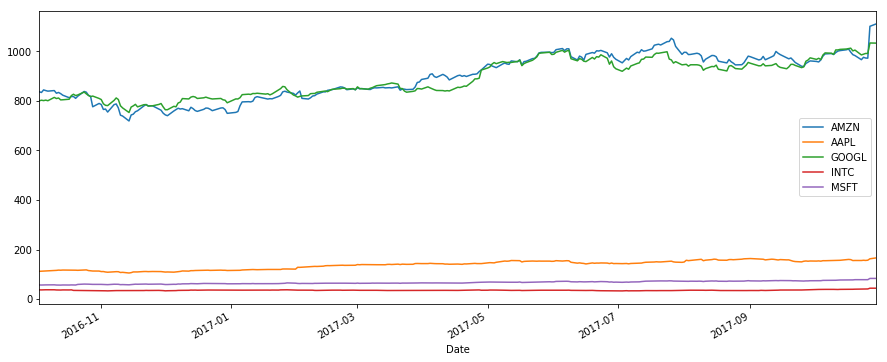

In [7]:
closes.plot(figsize=(15, 6))
plt.show()

#### Time Series plot of daily trading volume for 5 symbols

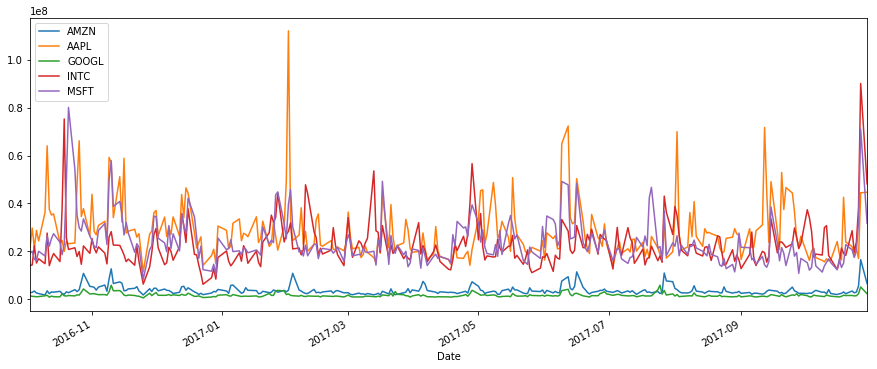

In [8]:
volume.plot(figsize=(15, 6))
plt.show()

### Forecasting Model

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
data=pd.DataFrame(data=closes.index, index=range(0,len(list(closes['AMZN']))) , columns=['Date','Amazon'])

data['Amazon']=list(closes['AMZN'])
print(data.head())
print('\n Data Types:')
print(data.dtypes)

        Date      Amazon
0 2016-10-03  836.739990
1 2016-10-04  834.030029
2 2016-10-05  844.359985
3 2016-10-06  841.659973
4 2016-10-07  839.429993

 Data Types:
Date      datetime64[ns]
Amazon           float64
dtype: object


In [11]:
data=pd.DataFrame(data=list(closes['AMZN']),index=closes.index, columns=['Amazon'])
print(data.head())
print('\n Data Types:')
print(data.dtypes)

                Amazon
Date                  
2016-10-03  836.739990
2016-10-04  834.030029
2016-10-05  844.359985
2016-10-06  841.659973
2016-10-07  839.429993

 Data Types:
Amazon    float64
dtype: object


In [12]:
data['2016'][0:3]

,Amazon
Date,
2016-10-03,836.739990
2016-10-04,834.030029
2016-10-05,844.359985


In [13]:
ts = data[ 'Amazon']
ts.head()

Date
2016-10-03    836.739990
2016-10-04    834.030029
2016-10-05    844.359985
2016-10-06    841.659973
2016-10-07    839.429993
Name: Amazon, dtype: float64

In [14]:
ts['2016-10-03']

836.73999000000003

In [15]:
#All rows:
ts['2016'][0:10]

Date
2016-10-03    836.739990
2016-10-04    834.030029
2016-10-05    844.359985
2016-10-06    841.659973
2016-10-07    839.429993
2016-10-10    841.710022
2016-10-11    831.000000
2016-10-12    834.090027
2016-10-13    829.280029
2016-10-14    822.960022
Name: Amazon, dtype: float64

### Function for testing stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


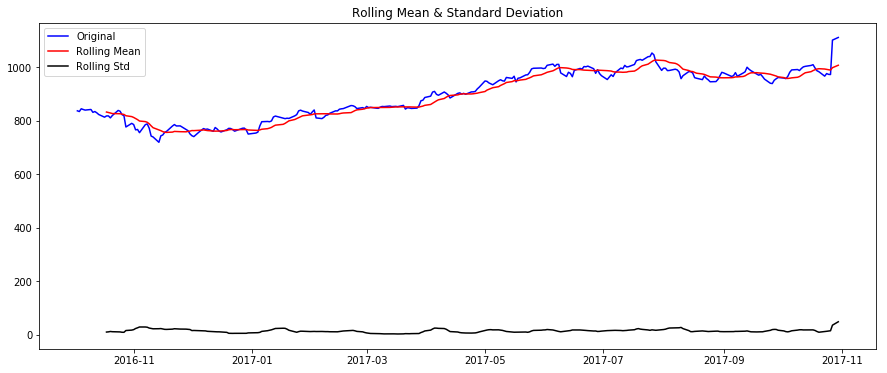

Results of Dickey-Fuller Test:
Test Statistic                  -0.073852
p-value                          0.951982
#Lags Used                       0.000000
Number of Observations Used    271.000000
Critical Value (1%)             -3.454713
Critical Value (5%)             -2.872265
Critical Value (10%)            -2.572485
dtype: float64


In [17]:
test_stationarity(ts)

In [40]:
# If the absolute value of the Test Statistic is greater than the absolute value of the Critical Value, 
# then the time series is stationary.

# In this case, .07 < -2.57, so the series is not stationary.

# Making TS Stationary


## Estimating & Eliminating Trend

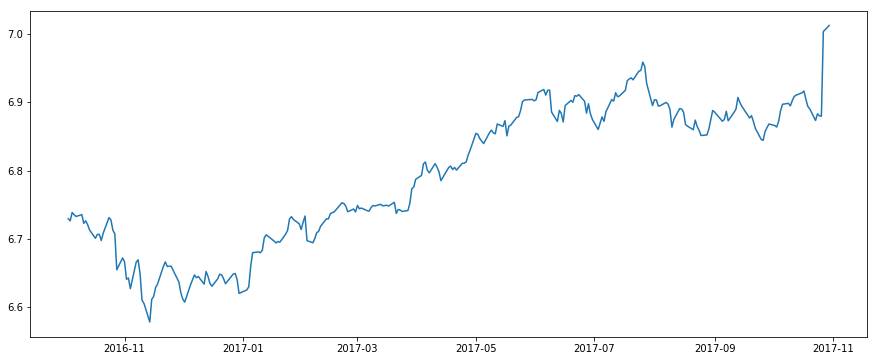

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


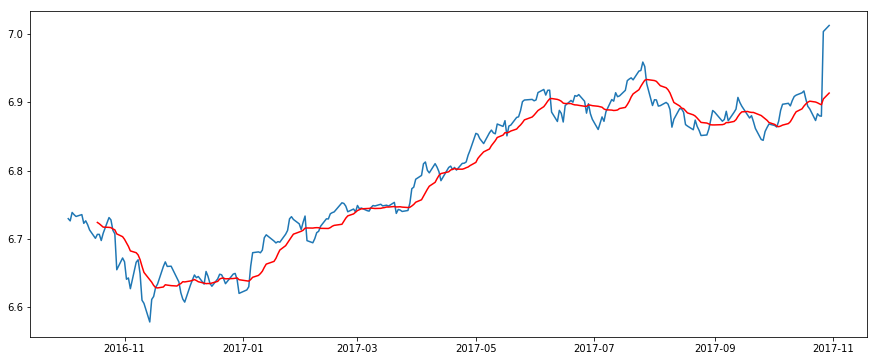

In [20]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [21]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2016-10-18   -0.017519
2016-10-19   -0.015551
2016-10-20   -0.022201
2016-10-21   -0.009016
2016-10-24    0.014391
Name: Amazon, dtype: float64

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


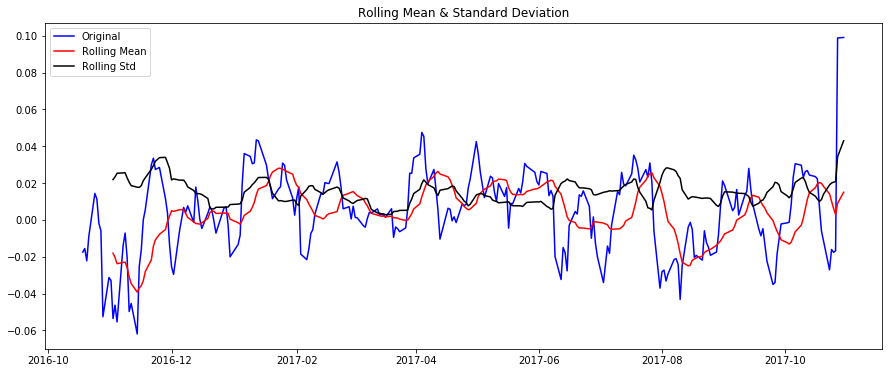

Results of Dickey-Fuller Test:
Test Statistic                  -5.089086
p-value                          0.000015
#Lags Used                       2.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
Critical Value (5%)             -2.872809
Critical Value (10%)            -2.572775
dtype: float64


In [22]:
test_stationarity(ts_log_moving_avg_diff);

### Exponentially Weighted Moving Average

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


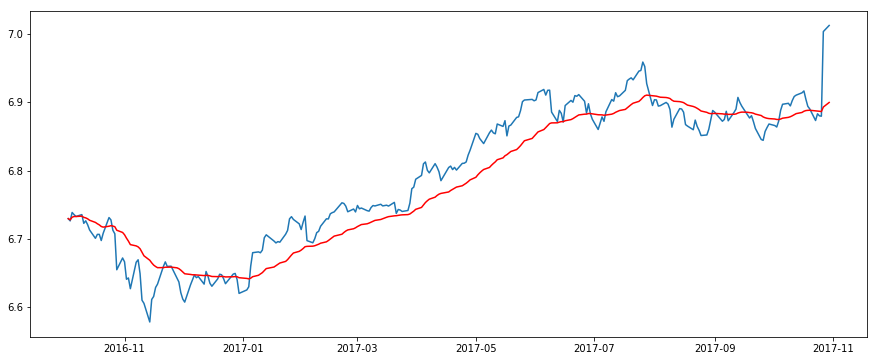

In [23]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


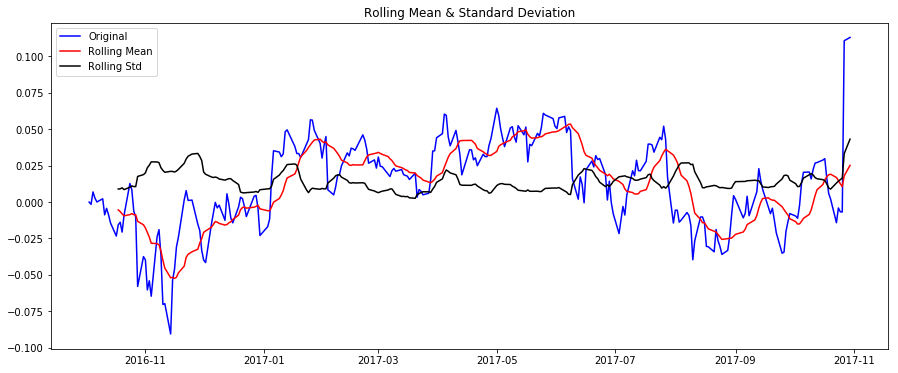

Results of Dickey-Fuller Test:
Test Statistic                  -2.953750
p-value                          0.039445
#Lags Used                       0.000000
Number of Observations Used    271.000000
Critical Value (1%)             -3.454713
Critical Value (5%)             -2.872265
Critical Value (10%)            -2.572485
dtype: float64


In [24]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

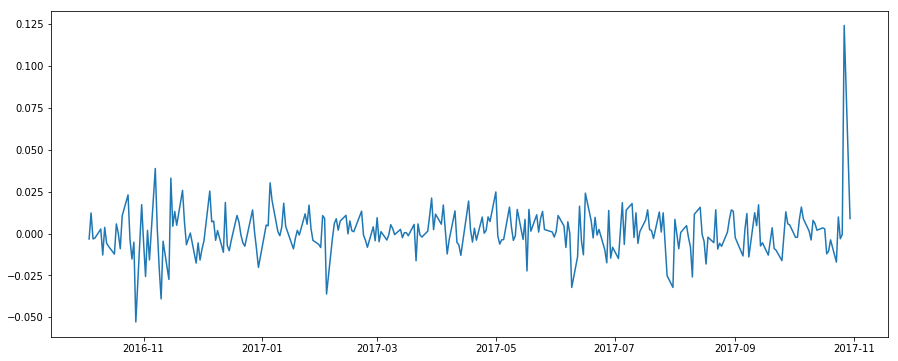

In [25]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


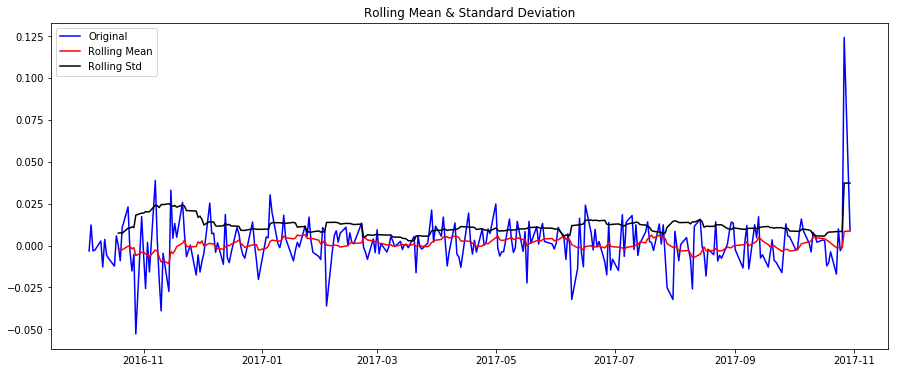

Results of Dickey-Fuller Test:
Test Statistic                -1.553823e+01
p-value                        2.176200e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [26]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that this series is probably stationary, since 15.5 > 2.57

### Decomposition:

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, freq=30)
#change made here

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


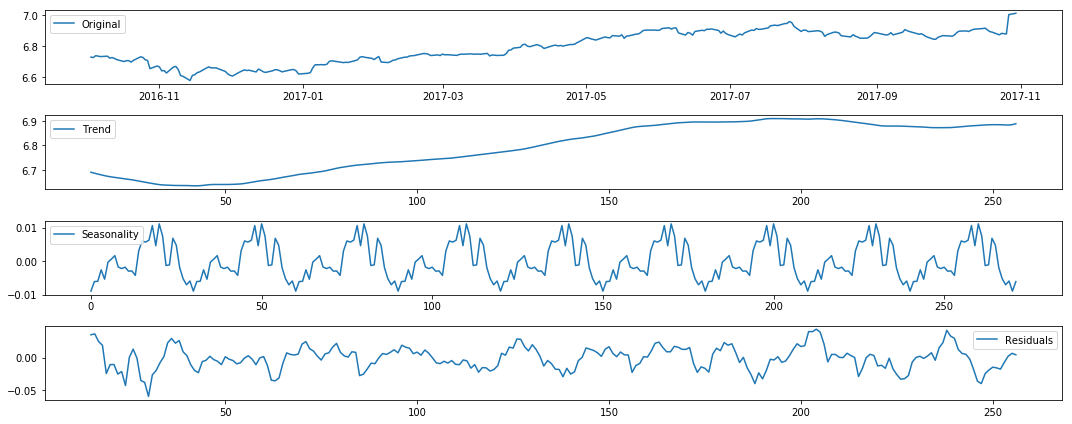

In [28]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [29]:
ts_log_decompose = pd.Series(data=residual)
type(ts_log_decompose)
ts_log_decompose.dropna(inplace=True)

/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/cynthiacorrea/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


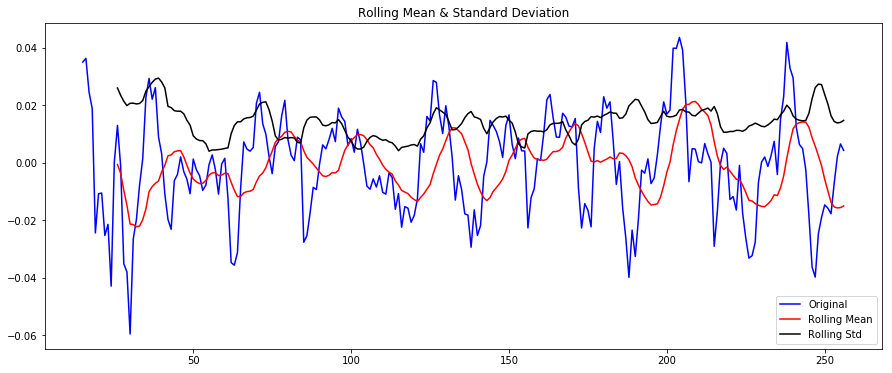

Results of Dickey-Fuller Test:
Test Statistic                -6.496293e+00
p-value                        1.192022e-08
#Lags Used                     5.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [30]:
test_stationarity(ts_log_decompose)

Series is still stationary. 

# Final Forecasting

### ACF & PACF Plots


ARIMA model has parameters (p, d, q) corresponding to  
- p: auto-regressive terms  
- d: differencing order  
- q: moving average terms  

To select p, we should find the ACF cutoff lag  

To select q, we should find the PACF cutoff lag

In [31]:
from IPython.display import Image

Image("img/acf.png")

In [32]:
Image("img/pacf.png")

In [33]:
from statsmodels.tsa.arima_model import ARIMA

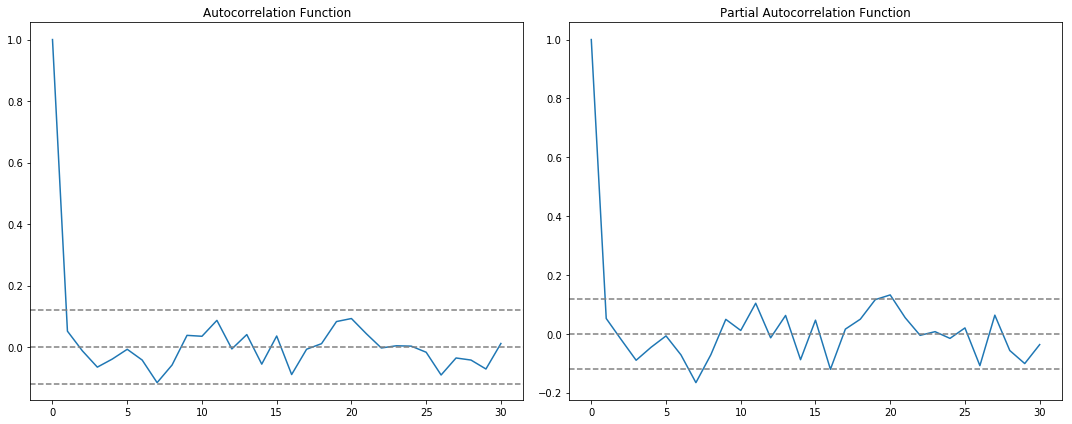

In [34]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=30)
lag_pacf = pacf(ts_log_diff, nlags=30, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

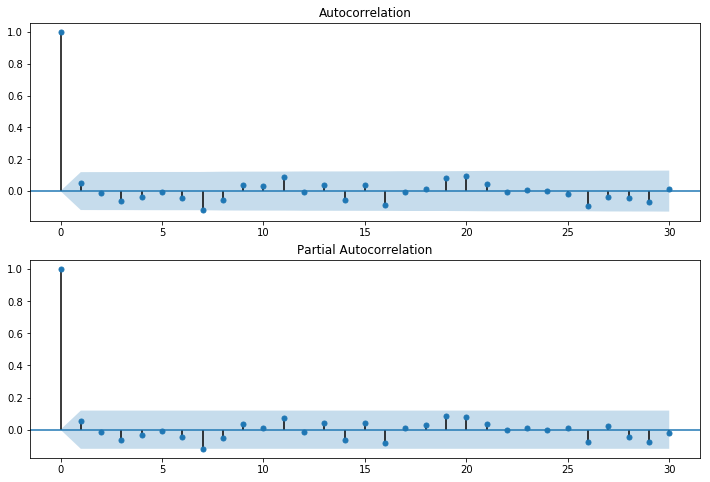

In [35]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=30, ax=ax2)

### AR Model:

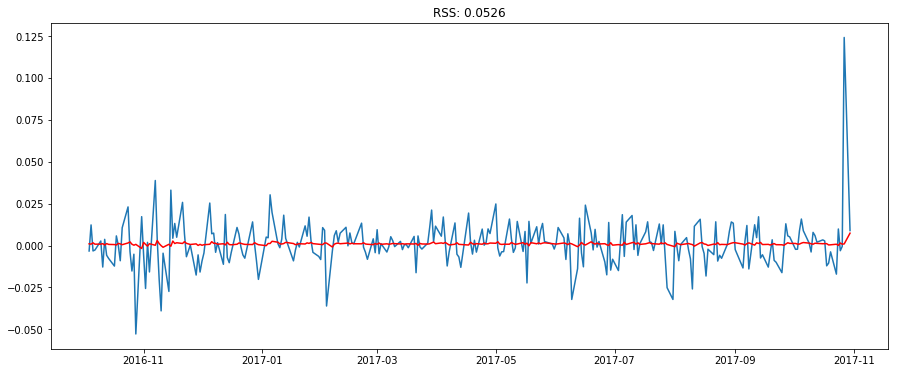

In [36]:
#MA model:
model = ARIMA(ts_log, order=(1,1,0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

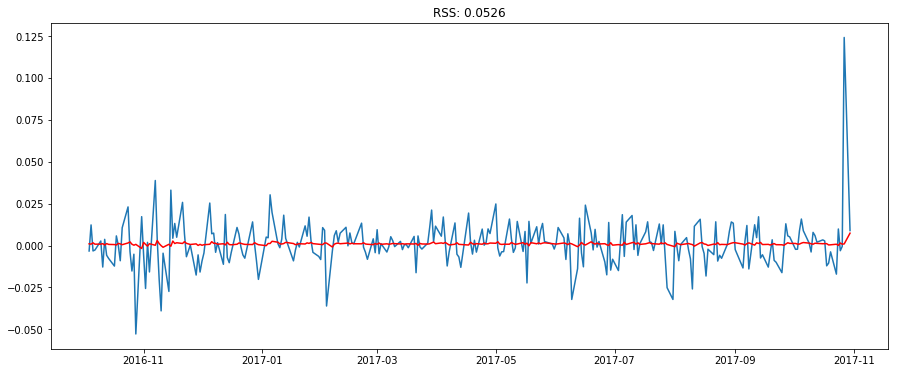

In [37]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model

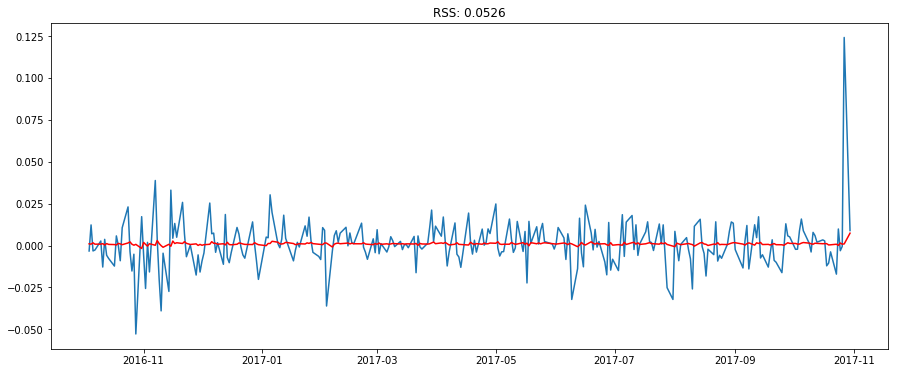

In [38]:
model = ARIMA(ts_log, order=(1,1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

Date
2016-10-04    0.001046
2016-10-05    0.000825
2016-10-06    0.001627
2016-10-07    0.000827
2016-10-10    0.000856
dtype: float64


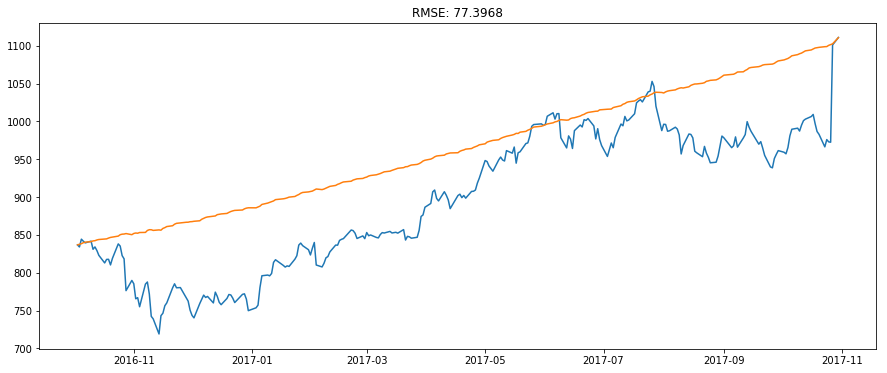

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print(predictions_ARIMA_diff_cumsum.head())


predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

#plt.plot(ts_log)
#plt.plot(predictions_ARIMA_log)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))